In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Задача 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

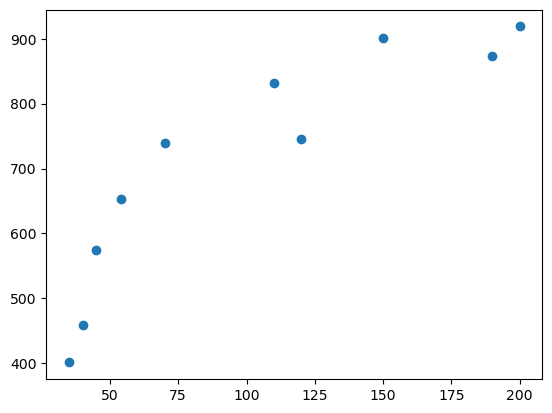

In [4]:
plt.scatter(x, y)

In [5]:
model_zpks = LinearRegression() #Строим модель в которой есть intercept

Так как интерсепт есть, и имеется один x и один y(парная регрессия), можем рассчиать коэфициенты по упрощенной формуле.
1) Расчет по формуле: 

In [6]:
n = 10
b1 = (np.mean(y * x) - np.mean(x) * np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
b1

2.620538882402765

In [7]:
b0 = np.mean(y) - b1*np.mean(x)
b0

444.1773573243596

2. Матричный метод:

In [8]:
x_reshaped = x.reshape(10, 1)  #Создаем двумерный список для работы с моделью
x_reshaped

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [9]:
y_reshaped = y.reshape(10, 1)
y_reshaped

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [10]:
X1 = np.hstack([np.ones((10, 1)), x_reshaped])
X1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [11]:
B = np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T @ y_reshaped)
B

array([[444.17735732],
       [  2.62053888]])

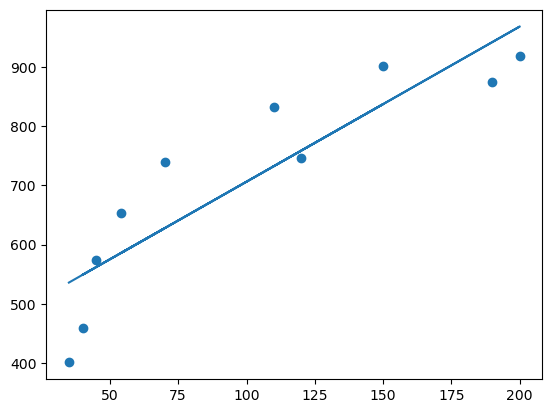

In [12]:
plt.scatter(x, y)
plt.plot(x, b0 + b1*x)

3) Расчет коэфициентов питон

In [13]:
model_zpks.fit(x_reshaped, y)   #обучаем модель

LinearRegression()

In [14]:
model_zpks.score(x_reshaped, y)

0.7876386635293686

In [15]:
d0 = model_zpks.intercept_
d1 = model_zpks.coef_
d1, d0

(array([2.62053888]), 444.17735732435955)

### Расчет без интерсепт

In [18]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [16]:
model_zpks1 = LinearRegression(fit_intercept = False)  #Строим модель без интерсепт

Матричный метод:

In [19]:
x1_reshaped = x1.reshape(-1, 1)
x1_reshaped

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [20]:
y1_reshaped = y1.reshape(-1, 1)
y1_reshaped

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [21]:
B = np.dot(np.linalg.inv(np.dot(x1_reshaped.T, x1_reshaped)), x1_reshaped.T @ y1_reshaped)
B

array([[5.88982042]])

2) Расчет в питон:

In [22]:
model_zpks1.fit(x1_reshaped, y1)    # Обучаем модель

LinearRegression(fit_intercept=False)

In [23]:
c1 = model_zpks1.coef_
c1

array([5.88982042])

In [24]:
c0 = model_zpks.intercept_   # Интерсепт не может быть посчитан, так как в модели его нет 

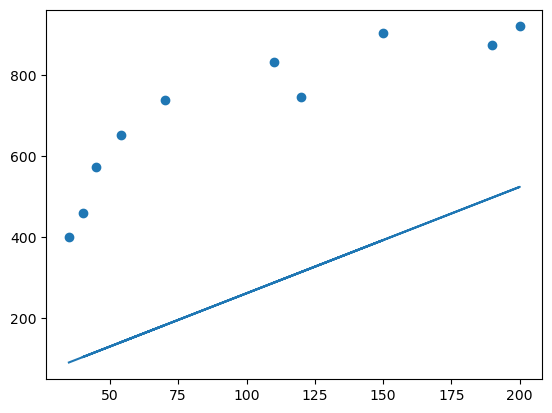

In [25]:
plt.scatter(x1, y1)
plt.plot(x1, b1*x1)

In [26]:
model_zpks1.score(x1_reshaped, y1)

-0.8549037531632884

### Задача 2 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [48]:
def mse_(c1, x = x, y = y, n = len(y)):
    return np.sum((c0 * x - y)**2)/n  #считаем функцию потерь(среднеквадратичную ошибку)

In [49]:
alpha = 1e-6  # задаем скорость обучения
c1 = 0.1

Дальше работаем с производной среднеквадртаичной ошибки, которую будем считать по коэфициенту c1.

In [50]:
for i in range(1800):
    c1 -= alpha * (2/n) * np.sum((c1 * x - y) * x)
    if i%300 == 0:
        print(f'Итерация = {i}, c1 = {c1}, mse = {mse_(c1)}')

Итерация = 0, c1 = 0.25952808, mse = 2646485788.354207
Итерация = 300, c1 = 5.888531320728348, mse = 2646485788.354207
Итерация = 600, c1 = 5.889820124983314, mse = 2646485788.354207
Итерация = 900, c1 = 5.889820420065112, mse = 2646485788.354207
Итерация = 1200, c1 = 5.889820420132673, mse = 2646485788.354207
Итерация = 1500, c1 = 5.889820420132673, mse = 2646485788.354207


In [52]:
mse_(5.889820420132673)   # считаем среднеквадратичную ошибку через функцию и получаем такое же значение

2646485788.354207